# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.147161e+01     7.143366e+00
 * time: 0.004494905471801758
     1     2.970488e+01     5.971705e+00
 * time: 0.013092994689941406
     2     2.604028e+01     1.135685e+01
 * time: 0.08611083030700684
     3     1.827909e+01     4.887082e+00
 * time: 0.11013603210449219
     4     1.313078e+01     1.374443e+00
 * time: 0.1336820125579834
     5     1.197939e+01     1.131875e+00
 * time: 0.15291500091552734
     6     1.116926e+01     2.031075e+00
 * time: 0.16824603080749512
     7     1.074451e+01     1.005443e+00
 * time: 0.1835799217224121
     8     1.028138e+01     8.316861e-01
 * time: 0.19900894165039062
     9     9.890698e+00     8.426381e-01
 * time: 0.21432805061340332
    10     9.479820e+00     8.079909e-01
 * time: 0.22976183891296387
    11     9.325883e+00     1.192158e+00
 * time: 0.24141597747802734
    12     9.158924e+00     1.124290e+00
 * time: 0.2532029151916504
    13     9.006980e+00     8.902503e-01
 * time: 

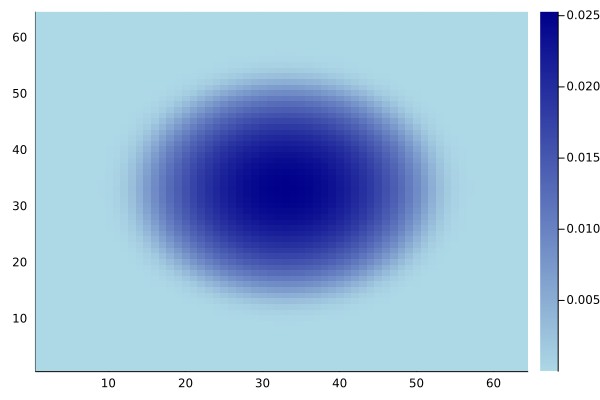

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)